<a href="https://colab.research.google.com/github/arunava001OS/DeepLearningPractice/blob/master/imdb_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

In [ ]:
print(train_data[0])
print(type(train_data[0]))
print(type(train_data))
print(train_data.shape)
print(train_data)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
<class 'list'>
<class 'numpy.ndarray'>
(25000,)
[list([1, 14

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()]
)
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[20]])
print(decoded_review)

? shown in australia as ? this incredibly bad movie is so bad that you become ? and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school ? class the sets are pathetic but ? better than the ? and the acting is wooden br br the ? ? seems to have been stolen from the props ? of ? ? there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money


In [ ]:
def vectorize_sequences(sequences,dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
print(train_data[0])
print(type(train_data[0]))
print(train_data.shape)

[0. 1. 1. ... 0. 0. 0.]
<class 'numpy.ndarray'>
(25000, 10000)


In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Dense(16,activation='relu',input_shape=(10000,)),
     tf.keras.layers.Dense(16,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)

In [ ]:
model.compile(
    optimizer = 'rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/4
30/30 [==============================] - 3s 89ms/step - loss: 0.5264 - accuracy: 0.7813 - val_loss: 0.4048 - val_accuracy: 0.8549
Epoch 2/4
30/30 [==============================] - 1s 31ms/step - loss: 0.3185 - accuracy: 0.9003 - val_loss: 0.3111 - val_accuracy: 0.8871
Epoch 3/4
30/30 [==============================] - 1s 30ms/step - loss: 0.2318 - accuracy: 0.9229 - val_loss: 0.2868 - val_accuracy: 0.8896
Epoch 4/4
30/30 [==============================] - 1s 30ms/step - loss: 0.1799 - accuracy: 0.9415 - val_loss: 0.2781 - val_accuracy: 0.8892


In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
validation_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
validation_acc_values = history_dict['val_accuracy']

epochs = range(1,5)

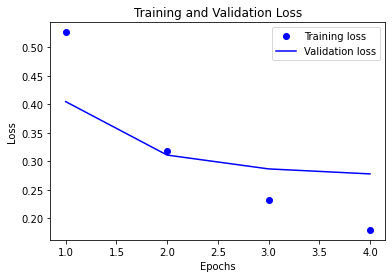

In [ ]:
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,validation_loss_values,'b',label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

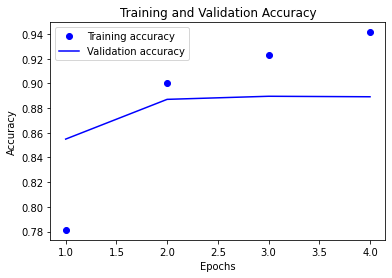

In [ ]:
plt.clf()
plt.plot(epochs,acc_values,'bo',label='Training accuracy')
plt.plot(epochs,validation_acc_values,'b',label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test,y_test)
print(results)

782/782 [==============================] - 1s 2ms/step - loss: 0.2950 - accuracy: 0.8810
[0.2950388789176941, 0.8809599876403809]


In [ ]:
model.predict(x_train)[20]

array([0.00475422], dtype=float32)